# Principal Component Analysis

Com os trabalhos pioneiros de e Pearson (1896) e Spearman (1904). As técnicas exploratórias de Análise Fatorial são úteisl quando há a intenção de redução de dimensionalidade, principalmente quando há uma forte correlação entre as variáveis, criando-se fatores que captam o comportamento conjunto das variáveis originais. De modo geral, consiste em uma técnica multivariada que busca identificar uma quantidade relativamente pequena de fatores que representam o comportamento conjunto de variáveis originais interdependentes.

A técnica de análise fatorial mais conhecida é a de componentes principais (transformação de Karhunen=Loève), e baseia-se no pressuposto de que pode ser extraído fatores não correlacionados a partir de combinações lineares das variáveis originais. Esse método possui carater exploratório ou de interdependência, visto que não possui caráter preditivo para outras observações não presentes inicialmente na amostra, e a inclusão de novas observações no banco de dados torna necessária a replicação da técnica.

A Análise de Componentes Principais (PCA), apresenta os seguintes objetivos:
- 1) Identificação de correlação entre variáveis originais para criação de fatores que representam a combinação linear daquelas variáveis (redução estrutural);
- 2) Verificação da Validade de Constructos previamente estabelecidos, tendo em vista a alocação das variáveis originais em cada fator;
- 3) Elaboração de rankings por meio da criação de indicadores de desempenho a partir dos fatores;
- 4) Extração de fatores ortogonais para posterior uso em técnicas multivariadas confirmatórias (regressões usando toda amostra) que necessitam de ausência de multicolinearidade.

Supondo uma amostra com $n$ observações e $K$ variáveis $X, X_{1},X_{2},...,X_{k}$. Primeiro, é obtido a matriz de correlações \rho que apresenta os valores das correlações linear de pearson, que varia de $-1$ a $1.$ um valor mais próximo de um desses extremos indica a existência de relação linear entre duas variáveis, podendo contribuir significativamente para extração de um único faotr. Já quando mais próximo de 0, a relação linear entre variáveis é praticamente inexistente, logo diferentes fatores podem ser extraídos. O que define a extração de cada um dos fatores é o cálculo dos autovalores da matriz de correlação.

In [70]:
#Libraries

#----- Data and numerical operations -----#
import numpy as np
import pandas as pd

#----- Graph and Charts -----#
from matplotlib import pyplot as plt
import seaborn as sns

#----- Dataset -----#
from sklearn.datasets import load_breast_cancer

#----- PCA -----#
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

#---- Adequation tests ----#
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

%matplotlib inline

In [71]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


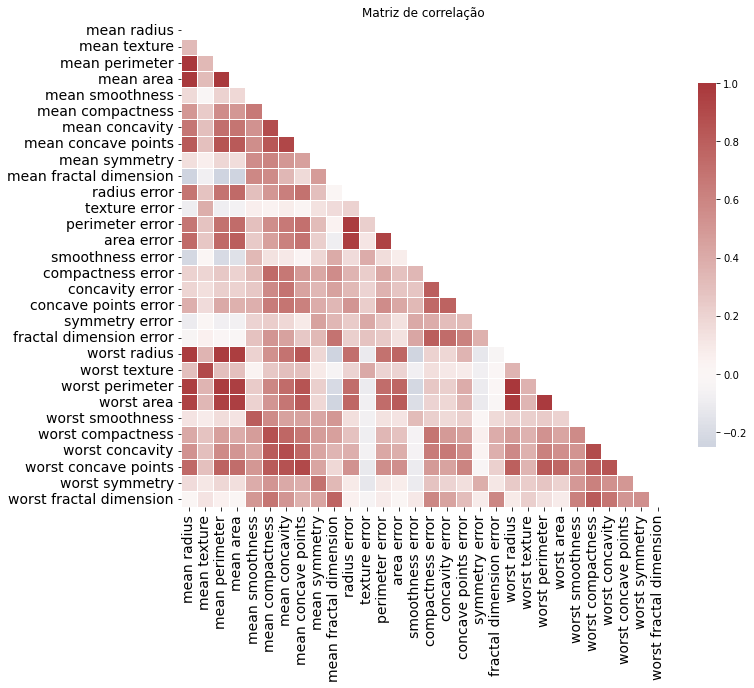

In [72]:
#correlations

corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.color_palette("vlag", as_cmap=True)

sns.heatmap(df.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = False,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

## Testes de adequação

Uma extração de fatores a partir de variáveis originais, requer que a matriz de correlações apresente valores relativamentes elevados e estatísticamente relevantes. a Estatística KMO e o teste de esfericidade de Barlett, fornecem um teste formal para verificar a adequação global da matriz de correlações.

### Estatística de Kaiser-Meyer-Olkin(KMO)
fornece a proporção de variância considerada comum a todas as variáveis na amostra em análise, ou seja, que pode ser atribuída à existência de um fator comum. Essa estatística varia de 0 a 1, valores próximos de 1 indicam que as variáveis compartilham um percentual de variâcia elevevado (alta correlação), o inverso é verdade. A estatística KMO é dada por:

$KMO=\frac{\sum{l=1}^{k} \sum {c=1}^{k} \rho_{k}^{2}}{\sum{l=1}^{k} \sum {c=1}^{k} \rho_{k}^{2} + \sum{l=1}^{k} \sum {c=1}^{k} \phi_{k}^{2}}$

Em que l e c, representam as linhas e colunas da matriz de correlação, respectivamente. O termo $\phi$ representa os coeficientes de correlação parcial (de ordem superior) entre duas variáveis. Enquanto $\rho$ são os coeficientes de correlação de ordem zero (de pearson).
O coeficiente de correlação de primeira ordem (correlação para 3 variáveis) é dado por:

$\phi_{ab,c}=\frac{\rho_{ab}-\rho_{ac}+\rho_{bc}}{\sqrt{(1-\rho_{ac}^{2})*(1-\rho_{bc}^{2})}}$, representa a correlação ente $X_a$ e $X_b$ mantendo $X_c$ constante;

A obtenção de coeficientes de correlação de ordens superiores, sempre devem ser feitas com base na determinação dos coeficienes de correlação parcial de ordens mais baixa.


|Estatística KMO| Adequação global da Análise fatorial|
|---|---|
|entre 1,00 e 0,90| muito boa|
|entre 0,90 e 0,80| boa|
|entre 0,80 e 0,70| média|
|entre 0,70 e 0,60| Razoável|
|entre 0,60 e 0,50| Má|
|menor que 0,50| Inaceitável|



### Teste de Esfericidade de Barlett
Esse teste consiste em comparar a matriz de correlações $\rho$ com uma matris identidade de mesma dimensão. Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatísticamente diferentes de 0, a determinado nível de significância, pode-se considerar que a extração de fatores não será adequada (correlações de pearson iguais a 0).

- $H_{0}: \rho=I$
- $H_{1}:  \rho \neq I$

A estatística correspondente é uma estatística de $\chi^{2}$ dada por:

$\chi^{2}_{Barlett}=-[(n-1)-\frac{2*k+5}{6}]*ln |D|$, com $\frac{k*(k-1)}{2}$ Graus de Liberdade. $n$ o tamanho da amostra, $k$ o número de variáveis e $D$ representa o determinante da matriz de correlação $\rho$


Ressalta-se que deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão. 

In [73]:
#KMO
kmo_all,kmo_model = calculate_kmo(df)
print('Valores de kmo_all =\n', kmo_all, '\n')
print('KMO =', kmo_model)

Valores de kmo_all =
 [0.83463512 0.64352613 0.85334054 0.86403253 0.814716   0.87939755
 0.89192843 0.90027723 0.82510264 0.83181381 0.83412178 0.48458942
 0.84290718 0.85199881 0.64427854 0.8712978  0.82547994 0.83516673
 0.5832182  0.81149623 0.82308704 0.60329755 0.88493799 0.82044529
 0.75316064 0.85127714 0.90222587 0.89105242 0.69074764 0.81233969] 

KMO = 0.8322253094687929


C:\Users\sousa\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [74]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print('Teste de Esfericidade de Bartlett: Chi² = ','%.2f' % chi_square_value ,
      "P_value: ", '%.2f' % p_value)

Teste de Esfericidade de Bartlett: Chi² =  39362.12 P_value:  0.00


## Autovalores e Auto vetores

m fator representa a combinação linear de variáveis originais, para um banco de dados com k variáveis, é possível criar k fatores. Os fatores são dados por:


$F_{ki}=s_{1k}*X_{1i}+s_{2k}*X_{2i}+...+s_{kk}*X_{ki}$, Em que $s$ são os **scores fatoriais**, que são parâmetros de um modelo linear que relaciona determinado fator com as variáveis originais.
O calculo dos scores fatoriais é elaborado a partir dos autosvalores e autovetores da matriz de correlações $\rho$. Uma matriz de correlações, com dimensões $k*k$ apresenta k autovalores $\lambda^{2}(\lambda_{1}^{2} \geq \lambda_{2}^{2} \geq ... \geq \lambda_{k}^{2})$ que são obtidos através de $det(\lambda^{2}*I-\rho)=0$, em que $I$ é a matriz identidade com dimenssões $k*k$. Além disso, observa-se que $\lambda_{1}^{2} \geq \lambda_{2}^{2} \geq ... \geq \lambda_{k}^{2}=k$. Essa multiplicação de matrizes irá gerá um sistema de equações que resultará no valor de cada autovetor.

Os scores fatoriais são determinados com base na determinação dos autos valores e autos vetores da matriz de correlação $rho$. Logo o score fatoria $s_{1k}$ é dado por $\frac{v_{1k}}{\sqrt{\lambda_{k}^{2}}}$.

Por tanto é possível obter cada fator com base na seguinte equação:
$F_{ki}=\frac{v_{1k}}{\sqrt{\lambda_{k}^{2}}}*ZX_{1i} + \frac{v_{2k}}{\sqrt{\lambda_{k}^{2}}}*ZX_{2i}+...+\frac{v_{kk}}{\sqrt{\lambda_{k}^{2}}}*ZX_{ki}$, em que $ZX_{i}$ representa o valor padronizado de cada variável X para determinada observação i. Como resultado os fatores extraídos são ortogonais entre si, com correlação iguais a 0.

In [75]:
# Criamos objeto factor_analysis, sem rotação e usando 5 fatores (tentativamente)
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

# Depois desse ajuste podemos coletar os autovetores e autovalores
ev, v = fa.get_eigenvalues()
print('São ' + str(len(ev)) + ' autovalores:\n', ev)

São 30 autovalores:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 3.11594025e-02
 2.99728939e-02 2.74394025e-02 2.43408378e-02 1.80550070e-02
 1.54812714e-02 8.17763986e-03 6.90046388e-03 1.58933787e-03
 7.48803097e-04 1.33044823e-04]


## Critério da raiz latente/Kaiser

Há um critério para definir a quantidade de fatores a serem extraídos, O mais conhecido é o critério de Kaiser/raiz latente, em que são selecionados somente fatores com autovalores maior ou iguais a 1. O primeiro fator extraído (Fator principal) contém o maior percentual de variância compartilhada pelas variáveis originais. Segundo Gorsuch (1983), a análise fatorial por componentes principais parece ser, na prática, bastante robusta contra violações de normalidade multivariada. 

Extraídos os fatores, pode-se definir as cargas fatoriais. Que são as correlações de Pearson entre as variáveis originais e cada um dos fatores. Dado o critério de Kaiser, é de supor que cargas fatoriais de correspondentes de a autovalores menores que 1 sejam baixas. Como as cargas fatoriais são correlações de Pearson entre cada variável e cada fator, o somatório dos quadrados dessas cargas fatoriais em cada linha será igual a 1, visto que cada variável compartilha parte do seu percentual de variância com todos os k fatores e seu somatório será 100\%. Mas esse somatório pode ser inferior a 1, quando levado em consideração o critério de kaiser, e atribuí-se o nome de comunalidade a esse somatório. Pois, representa a variância total compartilhada de cada variável em todos os fatores extraídos a partir de autovalores maiores que 1. O objetivo principal da análise das comunalidades é verificar se alguma variável acaba por não compartilhar um significativo percentual de variância com os fatores extraídos.

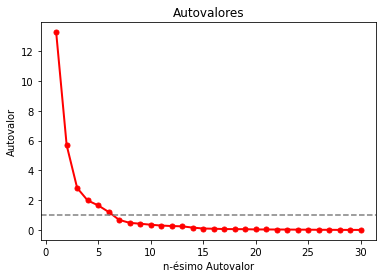

In [76]:
x = range(1, len(ev)+1)   # de 1 0 26
y = ev
plt.plot(x, y, color="red",lw=2,linestyle="-",marker="o",markersize="5") # 'r' is the color red
plt.axhline(y = 1, color = 'gray', linestyle = '--')
plt.xlabel('n-ésimo Autovalor')
plt.ylabel('Autovalor')
plt.title('Autovalores')
plt.show()

In [77]:
#Definindo quantidade de fatores de acordo com o critério de kaiser
fatores=6
fa.set_params(n_factors = fatores, method = 'principal', rotation = None)
fa.fit(df)

FactorAnalyzer(method='principal', n_factors=6, rotation=None,
               rotation_kwargs={})

In [78]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)


         Autovalor  Variância  Variância Acumulada
Fator 1  13.281608   0.442720             0.442720
Fator 2   5.691355   0.189712             0.632432
Fator 3   2.817949   0.093932             0.726364
Fator 4   1.980640   0.066021             0.792385
Fator 5   1.648731   0.054958             0.847343
Fator 6   1.207357   0.040245             0.887588


In [79]:
##%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_
tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df.columns
tabela_cargas

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
mean radius,0.797767,-0.557903,-0.014321,-0.058277,-0.048519,-0.020592
mean texture,0.378013,-0.142438,0.108358,0.848704,0.063519,0.035358
mean perimeter,0.829236,-0.513349,-0.015636,-0.059085,-0.047990,-0.019018
mean area,0.805393,-0.551270,0.048177,-0.075200,-0.013266,0.002074
mean smoothness,0.519653,0.444002,-0.175072,-0.224308,0.468784,0.314668
mean compactness,0.872050,0.362361,-0.124376,-0.044746,-0.015028,0.015527
mean concavity,0.941713,0.143534,0.004589,-0.026912,-0.110909,0.010267
mean concave points,0.950654,-0.082943,-0.042913,-0.091951,0.056319,0.057192
mean symmetry,0.503535,0.454107,-0.067550,-0.094468,0.392838,-0.391676
mean fractal dimension,0.234565,0.874523,-0.037895,-0.068379,0.057042,0.131230


In [57]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df.columns
tabela_comunalidades

,Comunalidades
mean radius,0.954067
mean texture,0.900507
mean perimeter,0.957559
mean area,0.960712
mean smoothness,0.866915
mean compactness,0.909715
mean concavity,0.920577
mean concave points,0.927362
mean symmetry,0.780979
mean fractal dimension,0.846398


In [80]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]
print(predict_fatores)

      Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
0    2.522460  0.816791 -0.669079 -2.581963  0.930750 -1.284517
1    0.655199 -1.579512 -0.315304 -0.794587 -0.484237 -0.026080
2    1.573347 -0.450683 -0.328680 -0.648084  0.137914 -0.492768
3    1.954496  4.307238 -1.925799 -0.108393  2.305928 -2.778875
4    1.079823 -0.816577  0.827895 -2.089483 -0.425806  1.116215
..        ...       ...       ...       ...       ...       ...
564  1.766910 -1.499301  1.465136 -0.836545  0.058273  2.161629
565  1.040882 -1.502332  1.244122  1.780668  0.397750  0.224527
566  0.344688 -0.797389  0.335223  1.484509 -1.409619  0.486393
567  2.846782  0.700860 -1.118161  1.674088  0.026278 -0.516871
568 -1.502374 -0.281112  0.887869  1.633676  0.143847 -1.472370

[569 rows x 6 columns]


In [82]:
factors = pd.concat([df.reset_index(drop=True), predict_fatores], axis=1)
factors.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,2.522460,0.816791,-0.669079,-2.581963,0.930750,-1.284517
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0.655199,-1.579512,-0.315304,-0.794587,-0.484237,-0.026080
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,1.573347,-0.450683,-0.328680,-0.648084,0.137914,-0.492768
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,1.954496,4.307238,-1.925799,-0.108393,2.305928,-2.778875
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,1.079823,-0.816577,0.827895,-2.089483,-0.425806,1.116215


In [84]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df.columns
tabela_scores

print(tabela_scores)

                          Fator 1   Fator 2   Fator 3   Fator 4   Fator 5  \
mean radius              0.060066 -0.098026 -0.005082 -0.029423 -0.029428   
mean texture             0.028461 -0.025027  0.038453  0.428500  0.038526   
mean perimeter           0.062435 -0.090198 -0.005549 -0.029831 -0.029107   
mean area                0.060640 -0.096861  0.017097 -0.037968 -0.008046   
mean smoothness          0.039126  0.078013 -0.062128 -0.113250  0.284330   
mean compactness         0.065658  0.063669 -0.044137 -0.022592 -0.009115   
mean concavity           0.070904  0.025220  0.001629 -0.013588 -0.067269   
mean concave points      0.071577 -0.014574 -0.015228 -0.046425  0.034159   
mean symmetry            0.037912  0.079789 -0.023971 -0.047696  0.238267   
mean fractal dimension   0.017661  0.153658 -0.013448 -0.034524  0.034598   
radius error             0.056519 -0.044244  0.159937 -0.069593  0.120291   
texture error            0.004782  0.037717  0.223172  0.255697  0.149257   

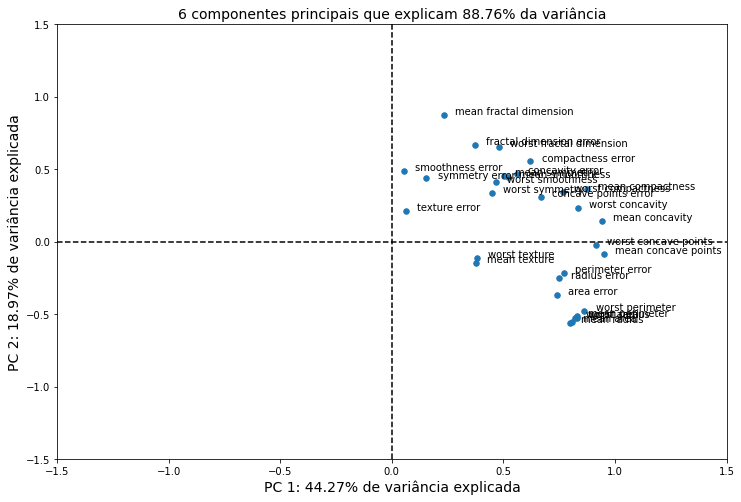

In [85]:
#%% Gráfico das cargas fatoriais e suas variâncias nos componentes principais

plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

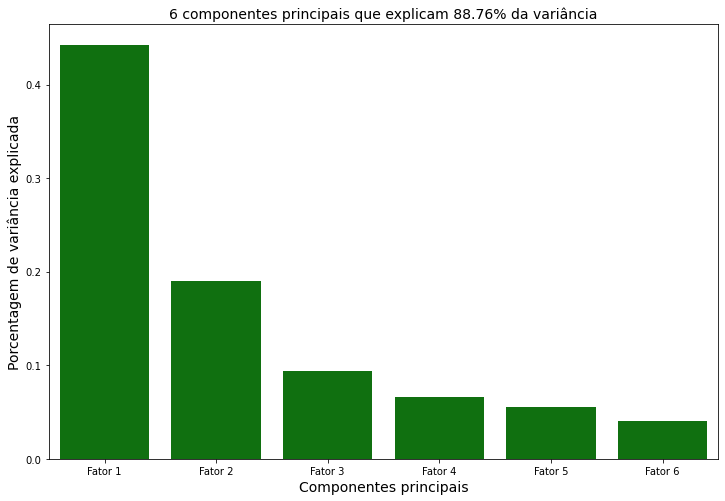

In [86]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))

plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, color='green')
plt.xlabel("Componentes principais", fontsize=14)
plt.ylabel("Porcentagem de variância explicada", fontsize=14)
plt.show()